In [25]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [39]:
# Load NorESM2 SSP585 forecasts
ssp585 = xr.open_dataset('outputs_ssp585.nc').drop(['quantile', 'member'])
ssp585['tas']

<xarray.DataArray 'tas' (member: 1, time: 86, lat: 96, lon: 144)>
[1188864 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Dimensions without coordinates: member

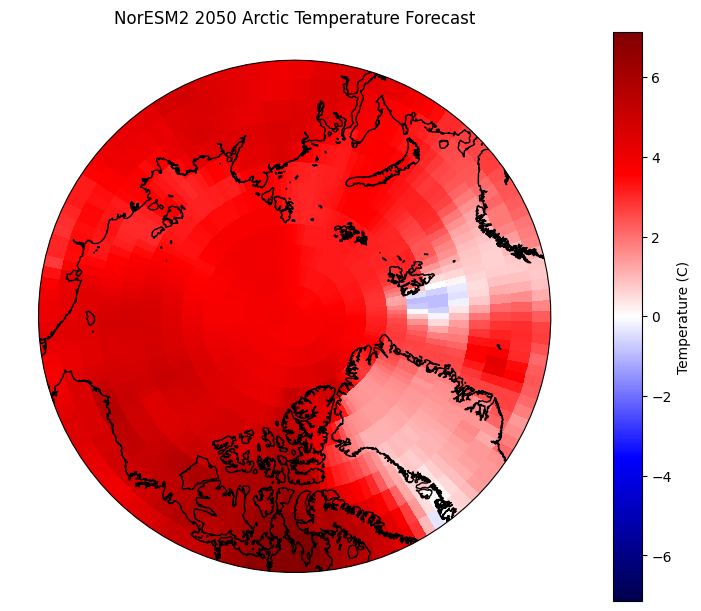

In [53]:
# Plot one year of Arctic data
fig, axes = plt.subplots(1, 1, subplot_kw={'projection':ccrs.NorthPolarStereo(central_longitude=-90)}, figsize=(8,6), constrained_layout=True)

ssp585['tas'].sel(time=2050).sel(lat=slice(67,90)).plot(ax=axes, transform=ccrs.PlateCarree(), cmap='seismic', cbar_kwargs={'label':'Temperature (C)'})

axes.coastlines(resolution='10m')
axes.add_feature(cfeature.LAND, facecolor='lightgrey')
axes.set_title('NorESM2 2050 Arctic Temperature Forecast')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.45
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axes.set_boundary(circle, transform=axes.transAxes)

plt.show()

In [23]:
# Get area averaged Arctic temperature predictions from the NorESM2 data
arctic_esm_ssp585_forecast = []

for i in ssp585['tas'].time.data:
    arctic_esm_ssp585_forecast.append(ssp585['tas'].sel(time=i).sel(lat=slice(67,90)).mean().data.item())

In [35]:
# Load Arctic EBM predictions
arctic_ebm_ssp585_forecast = pd.read_csv('arctic_ebm_ssp585_forecast.csv').columns.to_numpy()
arctic_ebm_ssp585_forecast = np.array(list(arctic_ebm_ssp585_forecast), dtype='float')

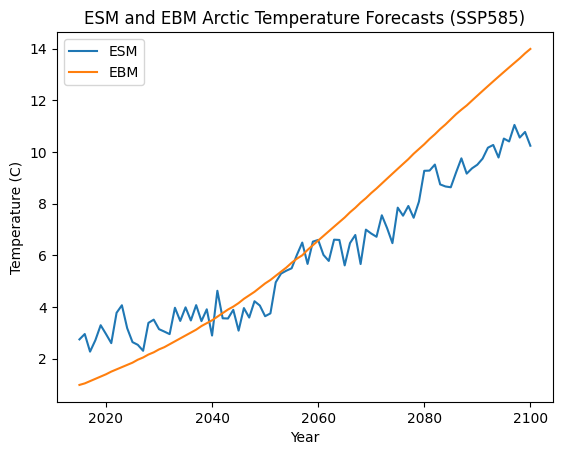

In [43]:
plt.plot(ssp585['tas'].time.data, arctic_esm_ssp585_forecast, label='ESM')
plt.plot(ssp585['tas'].time.data, arctic_ebm_ssp585_forecast, label='EBM')

plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.title('ESM and EBM Arctic Temperature Forecasts (SSP585)')
plt.legend()

plt.show()

In [50]:
# Compute mean absolute error between the EBM and the ESM
np.abs(arctic_ebm_ssp585_forecast - arctic_esm_ssp585_forecast).mean()

1.3842802641234808

In [51]:
# Compute mean bias between the EBM and the ESM
(arctic_ebm_ssp585_forecast - arctic_esm_ssp585_forecast).mean()

0.6896298837563676